#Importing Data and Libs

In [6]:
#Pip installs
!pip install kaggle
!pip install Augmentor

#Import
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

import glob
import imageio
import numpy as np
import PIL
import time
import pathlib
from IPython import display

from zipfile import ZipFile
from google.colab import files

In [5]:
#Kaggle Data Import
files.upload()

Saving archive.zip to archive.zip


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
#!kaggle datasets download --force -d phylake1337/fire-dataset

file_name = "/content/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [9]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


#Getting Data and Visualizing

In [10]:
#figure out how to add test

import os, random
import shutil

core_dir = "content/fire_dataset/"
!mkdir -rf "content/fire_dataset/train"


fire_dir = os.path.join('/content/fire_dataset/fire_images')
length = len(os.listdir(fire))
for i in range(length, 5):
    

random.choice([x for x in os.listdir("C:\\") if os.path.isfile(os.path.join("C:\\", x))])
    shutil.move(full_path, "/content/Training/no_tumor")

!rm -rf d

IndentationError: ignored

In [11]:
fire_dir = os.path.join('/content/fire_dataset/fire_images')
no_fire_dir = os.path.join('/content/fire_dataset/non_fire_images')

print('total training fire images:', len(os.listdir(fire_dir)))
print('total training no fire images:', len(os.listdir(no_fire_dir)))

fire_files = os.listdir(fire_dir)
print(fire_files[:10])

total training fire images: 755
total training no fire images: 244
['fire.161.png', 'fire.653.png', 'fire.384.png', 'fire.286.png', 'fire.577.png', 'fire.713.png', 'fire.651.png', 'fire.290.png', 'fire.584.png', 'fire.567.png']


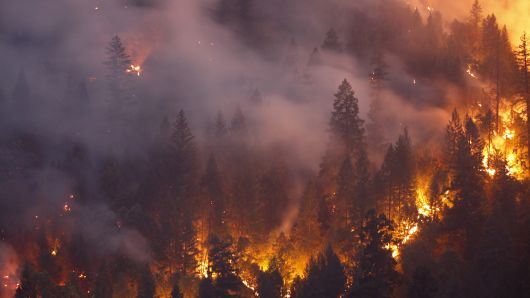

In [12]:
from IPython.display import Image, display
display(Image('/content/fire_dataset/fire_images/fire.102.png'))

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/fire_dataset/',  
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

# validation_generator = validation_datagen.flow_from_directory(
#         '/content/test/',  
#         target_size=(300, 300),  
#         batch_size=128,
#         class_mode='binary')

Found 999 images belonging to 2 classes.


#Actual Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       1

In [ ]:
from keras.callbacks import EarlyStopping

EPOCHS = 10
es = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=3
)

history = model.fit(
  train_generator,
  steps_per_epoch=int(999/128),  
  epochs=EPOCHS,
  # validation_data = validation_generator,
  # validation_steps=int(2000/128),
  callbacks=[es]
)

Epoch 1/10
7/7 [==============================] - 162s 22s/step - loss: 0.5879 - accuracy: 0.7290
Epoch 2/10
7/7 [==============================] - 159s 22s/step - loss: 0.3999 - accuracy: 0.8034
Epoch 3/10
7/7 [==============================] - 158s 22s/step - loss: 0.2577 - accuracy: 0.9119
Epoch 4/10
7/7 [==============================] - 158s 22s/step - loss: 0.1444 - accuracy: 0.9493
Epoch 5/10
7/7 [==============================] - 159s 22s/step - loss: 0.1455 - accuracy: 0.9457
Epoch 6/10
7/7 [==============================] - 158s 21s/step - loss: 0.1140 - accuracy: 0.9522
Epoch 7/10
7/7 [==============================] - 161s 22s/step - loss: 0.1453 - accuracy: 0.9452
Epoch 8/10
7/7 [==============================] - 161s 22s/step - loss: 0.1313 - accuracy: 0.9601
Epoch 9/10
7/7 [==============================] - 158s 22s/step - loss: 0.1436 - accuracy: 0.9413
Epoch 10/10
7/7 [==============================] - 161s 22s/step - loss: 0.1193 - accuracy: 0.9529


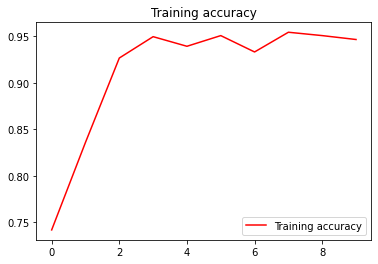

<Figure size 432x288 with 0 Axes>

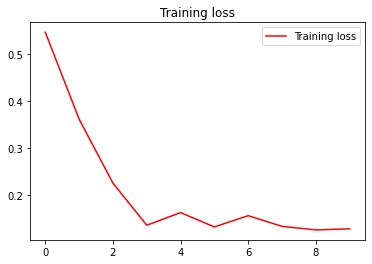

<Figure size 432x288 with 0 Axes>

In [ ]:
model.save("wildfire-weights.h5")

#Plotting
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
loss, acc = model.evaluate(train_generator, verbose=2)
print("Loss of model: " + str(loss)) 
print("Accuracy of model: "+ str(acc*100))